# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (4/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk4.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
0,0,38397,2,"WHITE SAUCE, MILK SAUCE (62.5); CHEESE, COLBY ...",2536,66.97,299.35,138.00,17.2,121.86,...,1,5.00,NaN,0.0,0.0,NaN,NaN,38397_NHANES_2005_2006,2536; 66.97; 299.35; 138.0; 17.2; 121.86,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,38399,2,"MILK, COW'S, FLUID, 2% FAT (884.5); MILK, COW'...",2161,105.69,258.95,126.33,11.5,78.96,...,1,0.51,NaN,0.0,1.0,NaN,NaN,38399_NHANES_2005_2006,2161; 105.69; 258.95; 126.33; 11.5; 78.96,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,38401,2,"MILK, COW'S, FLUID, 2% FAT (488); YOGURT, FRUI...",5813,155.52,758.23,217.82,31.9,179.95,...,3,2.18,NaN,0.0,0.0,0.0,NaN,38401_NHANES_2005_2006,5813; 155.52; 758.23; 217.82; 31.9; 179.95,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,38407,2,"EGG OMELET OR SCRAMBLED EGG, NS AS TO ADDED FA...",5395,191.03,751.15,269.34,43.9,182.11,...,1,1.20,NaN,0.0,0.0,0.0,NaN,38407_NHANES_2005_2006,5395; 191.03; 751.15; 269.34; 43.9; 182.11,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,38408,2,"MILK, COW'S, FLUID, 2% FAT (198.25); MILK, CHO...",1148,30.88,199.01,60.85,7.0,27.64,...,1,0.71,NaN,0.0,0.0,NaN,NaN,38408_NHANES_2005_2006,1148; 30.88; 199.01; 60.85; 7.0; 27.64,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,47269,2,"CHICKEN PATTY/FILLET/TENDERS, BREADED, COOKED ...",1228,43.58,167.82,53.42,9.4,43.96,...,4,0.73,NaN,0.0,0.0,0.0,NaN,47269_NHANES_2007_2008,1228; 43.58; 167.82; 53.42; 9.4; 43.96,USER:\n\nPlease analyze the patient's dietary ...
1124,1124,47279,2,"LIGHT ICE CREAM,SOFT SERVE CONE,NOT CHOC (DAIR...",1342,22.04,201.77,114.88,9.2,51.81,...,2,0.21,NaN,0.0,0.0,NaN,NaN,47279_NHANES_2007_2008,1342; 22.04; 201.77; 114.88; 9.2; 51.81,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,47338,2,"MILK, COW'S, FLUID, 2% FAT (259.25); ICE CREAM...",1795,51.69,285.61,140.23,10.1,51.72,...,3,0.63,NaN,0.0,0.0,NaN,NaN,47338_NHANES_2007_2008,1795; 51.69; 285.61; 140.23; 10.1; 51.72,USER:\n\nPlease analyze the patient's dietary ...
1126,1126,47342,2,"MILK, COW'S, FLUID, WHOLE (335.5); MILK, COW'S...",2155,74.26,275.33,153.54,19.2,84.91,...,2,2.04,NaN,0.0,0.0,NaN,NaN,47342_NHANES_2007_2008,2155; 74.26; 275.33; 153.54; 19.2; 84.91,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [3]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [4]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 56. I.e., these rows need post-processing.
Consistent rows: 1072. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,race,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Fine_Tuned
5,5,38411,2,"MILK, COW'S, FLUID, WHOLE (244); CRACKERS, CHE...",820,16.17,167.14,110.59,3.5,10.94,...,4,2.71,NaN,0.0,0.0,NaN,NaN,38411_NHANES_2005_2006,820; 16.17; 167.14; 110.59; 3.5; 10.94,USER:\n\nPlease analyze the patient's dietary ...
42,42,38581,2,"ICE CREAM, REGULAR, CHOCOLATE (88.67); HAM, SM...",1622,50.72,219.80,123.21,13.4,65.24,...,3,1.65,NaN,0.0,0.0,NaN,NaN,38581_NHANES_2005_2006,1622; 50.72; 219.8; 123.21; 13.4; 65.24,USER:\n\nPlease analyze the patient's dietary ...
54,54,38682,2,"MILK, COW'S, FLUID, WHOLE (183); CHEESE, NATUR...",2471,103.30,238.21,95.72,9.2,123.80,...,4,2.69,NaN,0.0,0.0,NaN,NaN,38682_NHANES_2005_2006,2471; 103.3; 238.21; 95.72; 9.2; 123.8,USER:\n\nPlease analyze the patient's dietary ...
55,55,38684,2,"MILK, COW'S, FLUID, WHOLE (244); CHEESE, PROCE...",2656,97.08,279.27,87.86,17.0,131.41,...,4,1.40,NaN,0.0,0.0,NaN,NaN,38684_NHANES_2005_2006,2656; 97.08; 279.27; 87.86; 17.0; 131.41,USER:\n\nPlease analyze the patient's dietary ...
57,57,38706,2,"CREAM, FLUID, NS AS TO LIGHT, HEAVY OR HALF & ...",1641,47.07,258.17,123.73,15.1,54.18,...,3,5.00,NaN,0.0,0.0,0.0,NaN,38706_NHANES_2005_2006,1641; 47.07; 258.17; 123.73; 15.1; 54.18,USER:\n\nPlease analyze the patient's dietary ...
58,58,38709,2,"CHEESE, NATURAL, CHEDDAR OR AMERICAN TYPE, RED...",582,27.98,56.39,23.50,3.1,27.14,...,4,2.10,NaN,0.0,0.0,0.0,NaN,38709_NHANES_2005_2006,582; 27.98; 56.39; 23.5; 3.1; 27.14,USER:\n\nPlease analyze the patient's dietary ...
65,65,38768,2,"CHICKEN, LEG, ROASTED/BROILED/BAKED, W/ SKIN (...",1033,77.61,69.74,38.74,3.7,48.40,...,4,2.92,NaN,0.0,0.0,0.0,NaN,38768_NHANES_2005_2006,1033; 77.61; 69.74; 38.74; 3.7; 48.4,USER:\n\nPlease analyze the patient's dietary ...
84,84,38864,2,"MILK, COW'S, FLUID, 2% FAT (183); FROOT LOOPS ...",502,12.78,90.86,59.69,1.3,9.91,...,4,1.15,NaN,0.0,0.0,0.0,NaN,38864_NHANES_2005_2006,502; 12.78; 90.86; 59.69; 1.3; 9.91,USER:\n\nPlease analyze the patient's dietary ...
92,92,38909,2,"MILK, COW'S, FLUID, 2% FAT (244); CHEESE, NFS ...",1512,112.44,143.11,75.54,4.5,52.45,...,1,0.60,NaN,0.0,0.0,NaN,NaN,38909_NHANES_2005_2006,1512; 112.44; 143.11; 75.54; 4.5; 52.45,USER:\n\nPlease analyze the patient's dietary ...
100,100,38954,2,"MILK, COW'S, FLUID, 2% FAT (366); MILK, CHOCOL...",2522,96.80,348.38,121.09,25.5,86.40,...,3,5.00,NaN,0.0,0.0,0.0,NaN,38954_NHANES_2005_2006,2522; 96.8; 348.38; 121.09; 25.5; 86.4,USER:\n\nPlease analyze the patient's dietary ...


In [5]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1072, 23)

# Create the variables (columns) for the predicted energy and macronutrients.
From the fine-tuned model.

In [6]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,smoker,id,Expected_Output,LLM_Fine_Tuned,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,38397,2,"WHITE SAUCE, MILK SAUCE (62.5); CHEESE, COLBY ...",2536,66.97,299.35,138.00,17.2,121.86,...,NaN,38397_NHANES_2005_2006,2536; 66.97; 299.35; 138.0; 17.2; 121.86,2331; 81.1; 285.8; 131.6; 11.2; 98.6,2331,81.10,285.80,131.60,11.2,98.60
1,1,38399,2,"MILK, COW'S, FLUID, 2% FAT (884.5); MILK, COW'...",2161,105.69,258.95,126.33,11.5,78.96,...,NaN,38399_NHANES_2005_2006,2161; 105.69; 258.95; 126.33; 11.5; 78.96,2231; 107.1; 286.11; 141.69; 10.3; 75.91,2231,107.10,286.11,141.69,10.3,75.91
2,2,38401,2,"MILK, COW'S, FLUID, 2% FAT (488); YOGURT, FRUI...",5813,155.52,758.23,217.82,31.9,179.95,...,NaN,38401_NHANES_2005_2006,5813; 155.52; 758.23; 217.82; 31.9; 179.95,5931; 139.1; 739.8; 239.1; 31.0; 164.64,5931,139.10,739.80,239.10,31.0,164.64
3,3,38407,2,"EGG OMELET OR SCRAMBLED EGG, NS AS TO ADDED FA...",5395,191.03,751.15,269.34,43.9,182.11,...,NaN,38407_NHANES_2005_2006,5395; 191.03; 751.15; 269.34; 43.9; 182.11,4231; 152.1; 601.78; 232.2; 24.3; 133.0,4231,152.10,601.78,232.20,24.3,133.00
4,4,38408,2,"MILK, COW'S, FLUID, 2% FAT (198.25); MILK, CHO...",1148,30.88,199.01,60.85,7.0,27.64,...,NaN,38408_NHANES_2005_2006,1148; 30.88; 199.01; 60.85; 7.0; 27.64,1446; 35.95; 259.1; 101.8; 7.9; 33.4,1446,35.95,259.10,101.80,7.9,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,1121,47250,2,"MILK, COW'S, FLUID, WHOLE (122); MILK, SOY, RE...",3358,138.48,368.56,221.14,13.1,153.63,...,NaN,47250_NHANES_2007_2008,3358; 138.48; 368.56; 221.14; 13.1; 153.63,3135; 116.15; 390.1; 201.1; 19.3; 133.4,3135,116.15,390.10,201.10,19.3,133.40
1122,1122,47251,2,"CHICKEN PATTY/FILLET/TENDERS, BREADED, COOKED ...",880,24.67,140.90,85.28,3.6,25.46,...,NaN,47251_NHANES_2007_2008,880; 24.67; 140.9; 85.28; 3.6; 25.46,1136; 40.82; 158.1; 83.11; 4.3; 39.0,1136,40.82,158.10,83.11,4.3,39.00
1124,1124,47279,2,"LIGHT ICE CREAM,SOFT SERVE CONE,NOT CHOC (DAIR...",1342,22.04,201.77,114.88,9.2,51.81,...,NaN,47279_NHANES_2007_2008,1342; 22.04; 201.77; 114.88; 9.2; 51.81,1396; 21.13; 221.1; 101.8; 11.2; 51.0,1396,21.13,221.10,101.80,11.2,51.00
1126,1126,47342,2,"MILK, COW'S, FLUID, WHOLE (335.5); MILK, COW'S...",2155,74.26,275.33,153.54,19.2,84.91,...,NaN,47342_NHANES_2007_2008,2155; 74.26; 275.33; 153.54; 19.2; 84.91,2216; 80.1; 321.8; 151.91; 19.3; 71.0,2216,80.10,321.80,151.91,19.3,71.00


# Compute regression validation metrics.
Ground truth vs fine-tuned mode.

In [7]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,61046.7416,181.0718,0.1026,247.0764,0.9368
DRxIPROT,119.3458,7.7908,0.1197,10.9245,0.9295
DRxICARB,1429.1765,29.1226,0.1343,37.8045,0.9153
DRxISUGR,485.0267,15.8953,0.1758,22.0233,0.9111
DRxIFIBE,13.6705,2.1510,0.1712,3.6974,0.8115
DRxITFAT,221.2621,9.6594,0.1390,14.8749,0.8899


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs fine-tuned mode.

In [8]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-5.158033,2.972000e-07
DRxIPROT,-4.764155,2.157400e-06
DRxICARB,-11.660213,0.000000e+00
DRxISUGR,-4.816921,1.667700e-06
DRxIFIBE,5.777692,9.900000e-09
DRxITFAT,4.719437,2.678100e-06


# Create Bland-Atlman plots.
Ground truth vs fine-tuned mode.

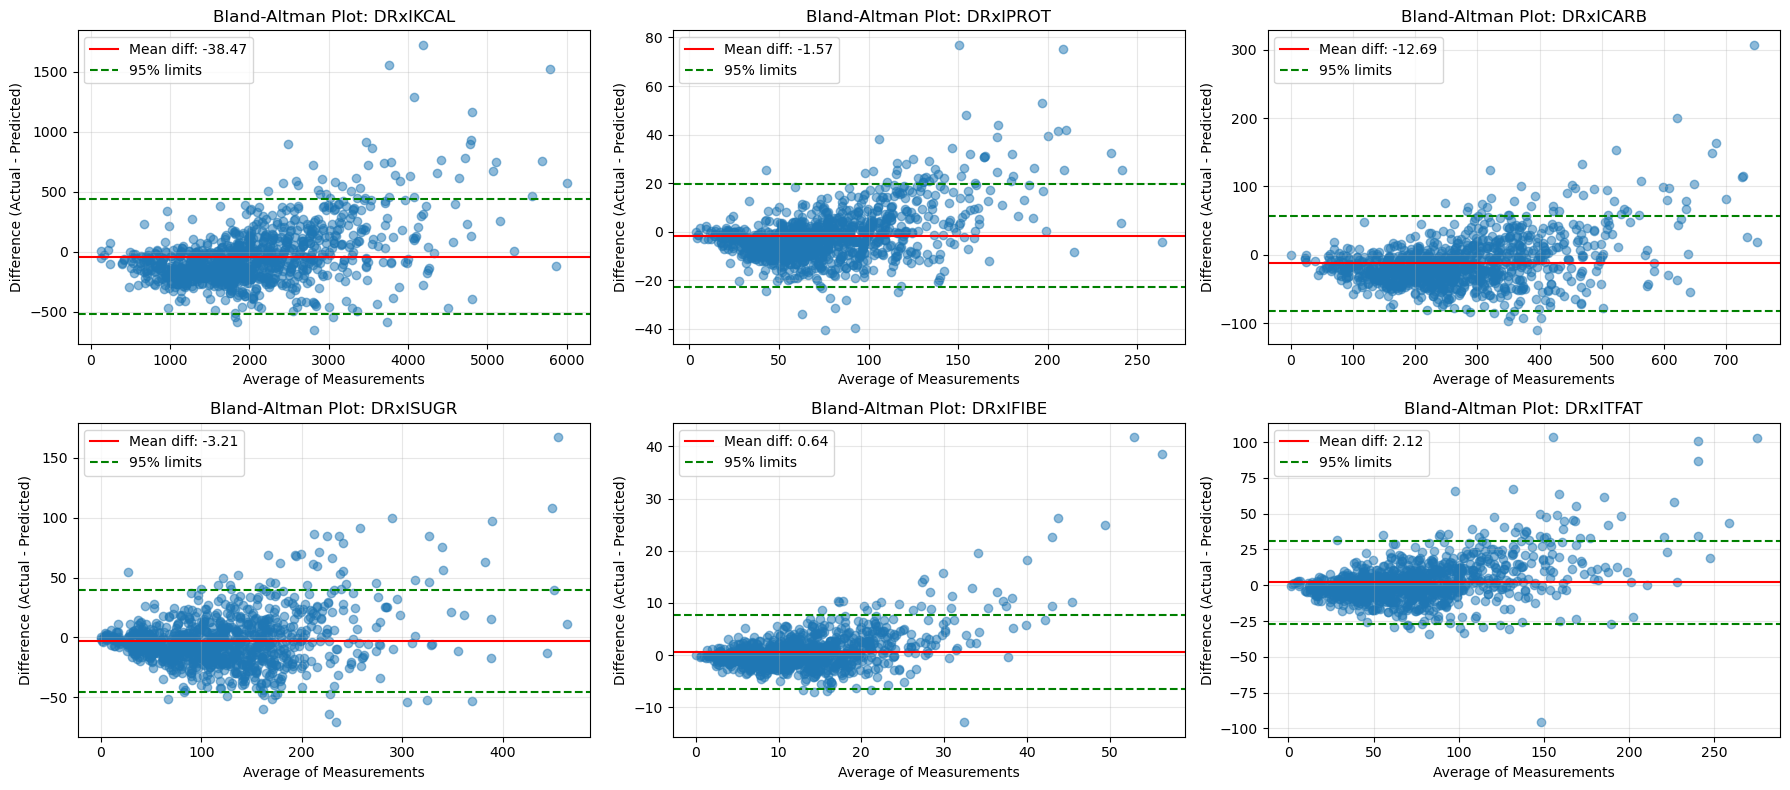

In [9]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.954706
DRxIPROT 0.949952
DRxISUGR 0.947328
DRxICARB 0.936247
DRxITFAT 0.922863
DRxIFIBE 0.849281

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9919


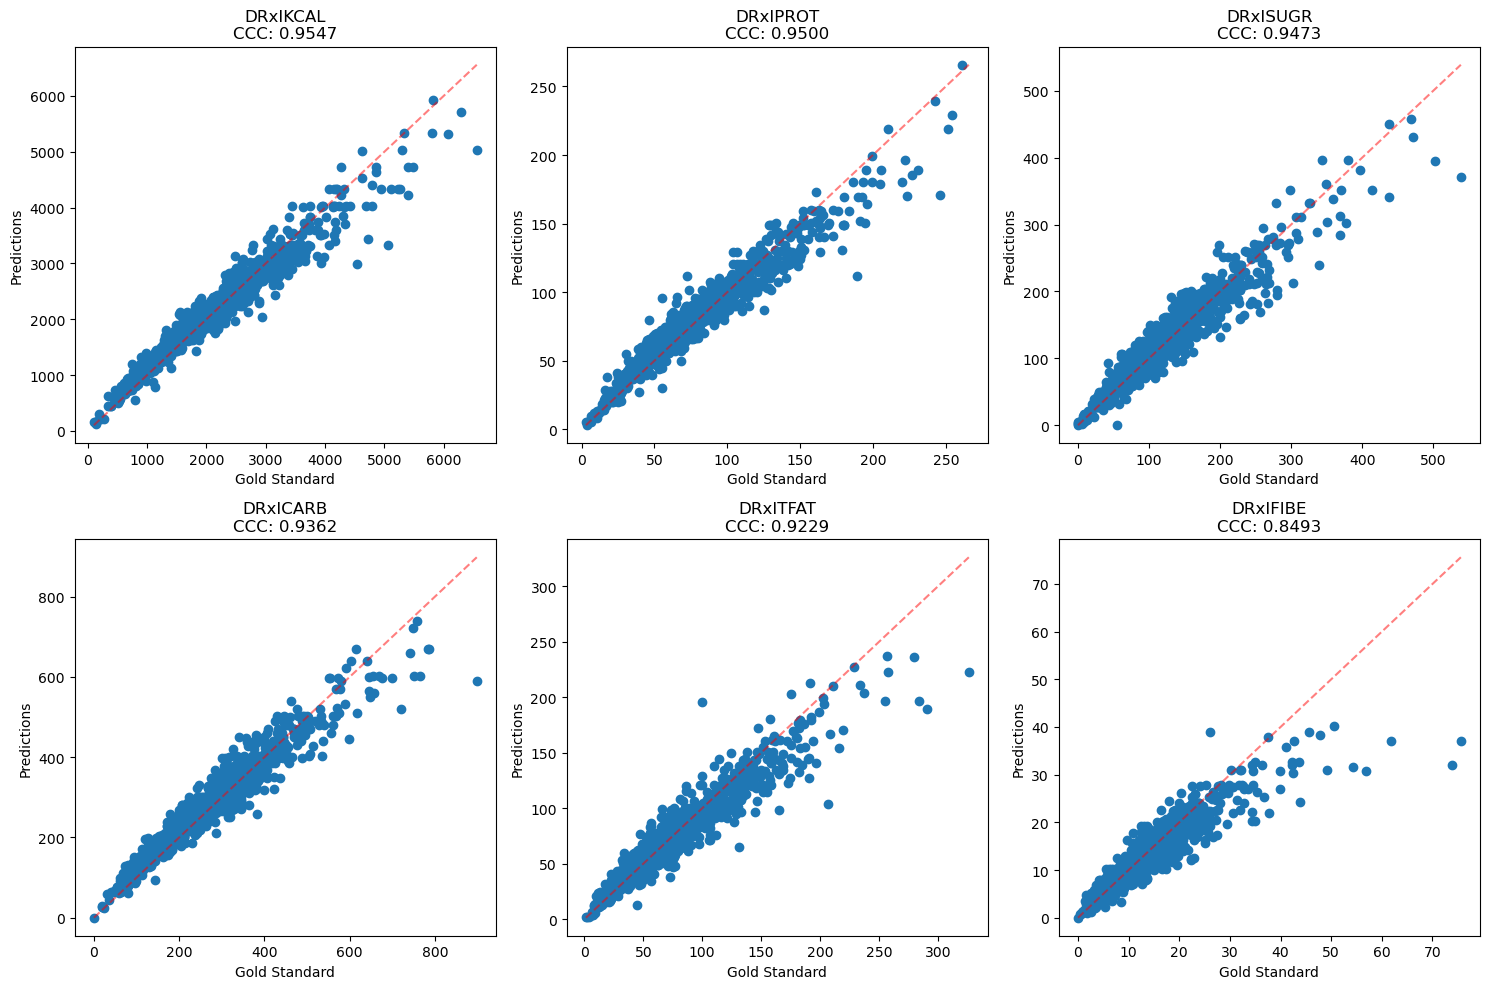

In [10]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()